<a href="https://colab.research.google.com/github/karlaguimaraesp/Projetos-Guiados---Cousera/blob/main/Covid19_detection_using_X_ray_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1 : Import Libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


# TASK 2 : Clone & Explore dataset

In [ ]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 17.38 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
#set the path to the main dir

import os
main_dir = "/content/datasets/Data"

#set the path to the train dir
train_dir = os.path.join(main_dir, 'train')

#set the path to the test dir
test_dir = os.path.join(main_dir, 'test')

#directory with the training covid images
train_covid_dir = os.path.join(train_dir, 'COVID19')

#directory with the training normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')
#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, 'COVID19')
#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [ ]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_dir = os.listdir(test_normal_dir)
print(test_normal_dir[:10])

['COVID19(39).jpg', 'COVID19(181).jpg', 'COVID19(291).jpg', 'COVID19(298).jpg', 'COVID19(486).jpg', 'COVID19(201).jpg', 'COVID19(339).jpg', 'COVID19(357).jpg', 'COVID-19 (197).jpg', 'COVID-19 (107).jpg']
['NORMAL(1474).jpg', 'NORMAL(1194).jpg', 'NORMAL(572).jpg', 'NORMAL(1527).jpg', 'NORMAL(685).jpg', 'NORMAL(1172).jpg', 'NORMAL(1429).jpg', 'NORMAL(1567).jpg', 'NORMAL(739).jpg', 'NORMAL(888).jpg']
['COVID19(552).jpg', 'COVID19(285).jpg', 'COVID19(439).jpg', 'COVID-19 (540).jpg', 'COVID19(408).jpg', 'COVID-19 (799).jpg', 'COVID19(121).jpg', 'COVID19(158).jpg', 'COVID19(385).jpg', 'COVID19(197).jpg']
['NORMAL(394).jpg', 'NORMAL(526).jpg', 'NORMAL(1423).jpg', 'NORMAL(75).jpg', 'NORMAL(1088).jpg', 'NORMAL(99).jpg', 'NORMAL(1044).jpg', 'NORMAL(290).jpg', 'NORMAL(692).jpg', 'NORMAL(1120).jpg']


In [ ]:
#print the total no of images present in each dir
print("Total images present in the training set :", len(train_covid_names+train_normal_names))
print("Total images present in the training set :", len(test_covid_names+test_normal_dir))

Total images present in the training set : 1811
Total images present in the training set : 484


# TASK 3 : Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(39).jpg', '/content/datasets/Data/train/COVID19/COVID19(181).jpg', '/content/datasets/Data/train/COVID19/COVID19(291).jpg', '/content/datasets/Data/train/COVID19/COVID19(298).jpg', '/content/datasets/Data/train/COVID19/COVID19(486).jpg', '/content/datasets/Data/train/COVID19/COVID19(201).jpg', '/content/datasets/Data/train/COVID19/COVID19(339).jpg', '/content/datasets/Data/train/COVID19/COVID19(357).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1474).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1194).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(572).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1527).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(685).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1172).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1429).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1567).jpg']


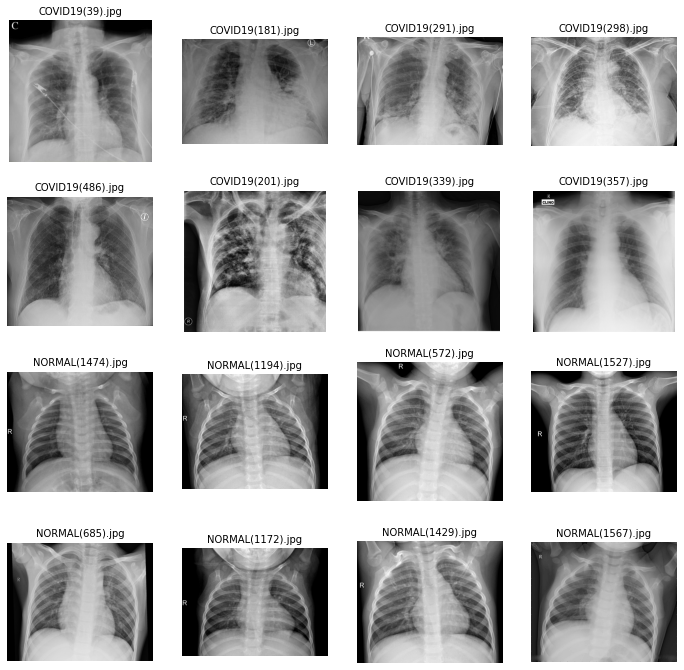

In [ ]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir, filename)for filename in train_normal_names[0:8]]
#print the list
print(covid_pic)
print(normal_pic)
#merge the covid and normal list
merged_list = covid_pic + normal_pic
for i, img_path in enumerate(merged_list):
  data = img_path.split('/', 6)[6]
  sp = plt.subplot(rows, cols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=10)
  plt.imshow(img,cmap='gray')

plt.show()

# TASK 4 : Data Preprocessing & Augmentation

In [ ]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale = 1./225,
                                validation_split=0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)
dgen_validation = ImageDataGenerator(rescale=1./255)
dgen_test = ImageDataGenerator(rescale=1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir, 
                                                 target_size=(150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir, 
                                                 target_size=(150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 1449 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [ ]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5), padding='SAME', activation='relu',input_shape=(150, 150, 3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5), padding='SAME', activation='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

# TASK 6 : Compile & Train the Model

In [ ]:
#compile the model
model.compile(Adam(lr=0.001),loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#train the model
history = model.fit(train_generator,
                    epochs=30,
                    validation_data = validation_generator)

Epoch 1/30
46/46 [==============================] - 106s 2s/step - loss: 0.8431 - accuracy: 0.7729 - val_loss: 0.4295 - val_accuracy: 0.8475
Epoch 2/30
46/46 [==============================] - 73s 2s/step - loss: 0.2190 - accuracy: 0.9144 - val_loss: 0.2222 - val_accuracy: 0.9545
Epoch 3/30
46/46 [==============================] - 73s 2s/step - loss: 0.1655 - accuracy: 0.9476 - val_loss: 0.2148 - val_accuracy: 0.9545
Epoch 4/30
46/46 [==============================] - 74s 2s/step - loss: 0.1700 - accuracy: 0.9427 - val_loss: 0.1223 - val_accuracy: 0.9648
Epoch 5/30
46/46 [==============================] - 74s 2s/step - loss: 0.1466 - accuracy: 0.9496 - val_loss: 0.2272 - val_accuracy: 0.9441
Epoch 6/30
46/46 [==============================] - 73s 2s/step - loss: 0.1353 - accuracy: 0.9462 - val_loss: 0.1084 - val_accuracy: 0.9676
Epoch 7/30
46/46 [==============================] - 73s 2s/step - loss: 0.1242 - accuracy: 0.9572 - val_loss: 0.0876 - val_accuracy: 0.9710
Epoch 8/30
46/46 [=

# TASK 7 : Performance Evaluation

In [ ]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

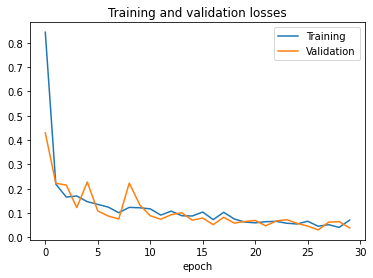

In [ ]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

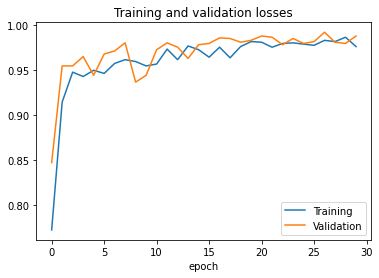

In [ ]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

In [ ]:
# get the test acuarcy and loss
test_loss , test_acc = model.evaluate(test_generator)
print('test loss :{} test acc :{}' .format(test_loss,test_acc))

16/16 [==============================] - 10s 609ms/step - loss: 0.0541 - accuracy: 0.9814
test loss :0.05414329469203949 test acc :0.9814049601554871


# TASK 8 : Prediction On New Data

In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/'+filename
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(filename)

  if prediction == 0:
    print('covid detected')
  else:
    print('Your report is normal')

Saving covid1.jpg to covid1.jpg
Saving covid2.jpeg to covid2.jpeg
Saving normal1.jpg to normal1.jpg
Saving normal2.jpg to normal2.jpg
covid1.jpg
covid detected
covid2.jpeg
covid detected
normal1.jpg
Your report is normal
normal2.jpg
Your report is normal
